# Exploratory Data Analysis in Python

## 1 Getting to know a dataset

* derive insights
* generate hypotheses

In [6]:
# import libraries
import pandas as pd

# import data
books = pd.read_csv('clean_books.csv')

# head for glance
print(books.head())

# missing values
print(books.isnull().sum())
print(books.info())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  rating  year        genre  
0                  JJ Smith     4.7  2016  Non Fiction  
1              Stephen King     4.6  2011      Fiction  
2        Jordan B. Peterson     4.7  2018  Non Fiction  
3             George Orwell     4.7  2017      Fiction  
4  National Geographic Kids     4.8  2019    Childrens  
name      0
author    0
rating    0
year      0
genre     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    obje

In [7]:
# look at categorical columns

print(books.value_counts('genre'))

genre
Non Fiction    179
Fiction        131
Childrens       40
dtype: int64


In [8]:
# basic stats on numerical columns
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


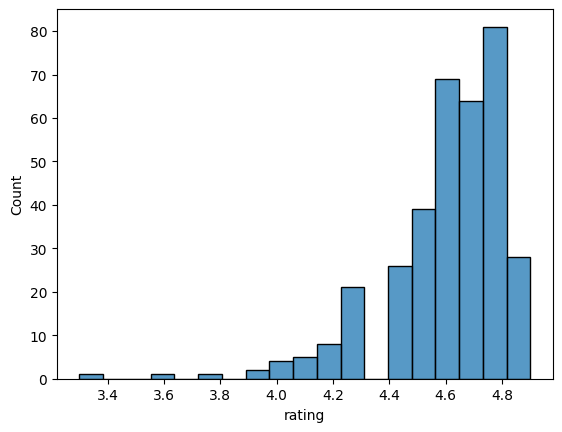

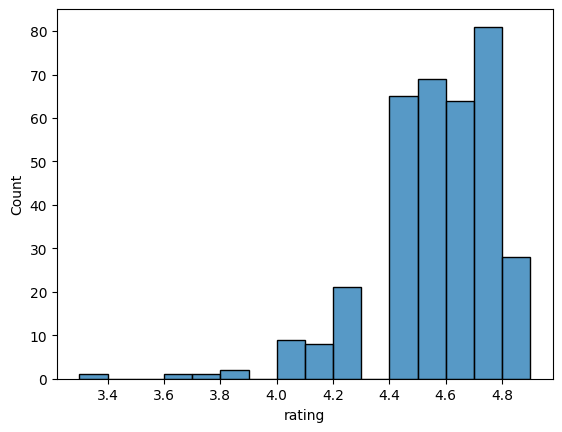

In [11]:
# visualising data

import matplotlib.pyplot as plt
import seaborn as sns

#sns.histplot(books['rating'])
sns.histplot(data=books, x='rating')
plt.show()

# change binwidth to 0.1
sns.histplot(data=books, x='rating', binwidth=0.1)
plt.show()

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  D

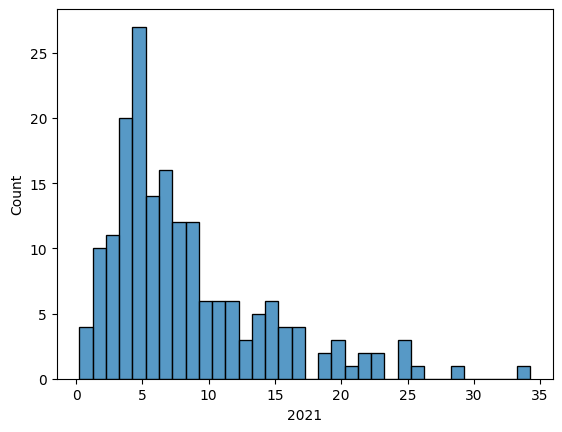

In [14]:
# working example

#import dataset
unemployment = pd.read_csv('clean_unemployment.csv')

print(unemployment.head(5))

# Print a summary of non-missing values and data types in the unemployment DataFrame
print(unemployment.info())

# Print summary statistics for numerical columns in unemployment
print(unemployment.describe())

# Count the values associated with each continent in unemployment
print(unemployment['continent'].value_counts())

# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x = '2021', binwidth = 1)
plt.show()


### data validation

**validating data types**
`.astype()` - method to change datatype: df['col'] = df['col'].astype(int)
* common types include `str` (string), `int` (integer), `float` (float), `dict` (dictionary), `list` (list), `bool` (Boolean)
* check with `.dtypes`

**validating categorical data**
`df['col'].isin(['xxx', 'yyy'])`
* returns a series of the same shape and size of the original but with T/F in place of values

`~df['col'].isin(['xxx', 'yyy'])` will invert the True/False so that True is returned if the value is NOT in the list passed to the dot.isin

* can use this to filter the dataframe for only values which are in the list: 
  * books[books['genre'].isin(['Fiction', 'Non Fiction'])] will return only rows where genre is fiction or non-fiction

**validating numerical data**
* `df.select_dtypes('number').head()`
* `df['col'].min()`
* `df['col'].max()`
* `sns.boxplot(data=books, x='year')`
* `sns.boxplot(data=books, x='year', y='genre')`


In [15]:
# working example

# Update the data type of the 2019 column to a float
unemployment["2019"] = unemployment['2019'].astype(float)
# Print the dtypes to check your work
print(unemployment.dtypes)

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

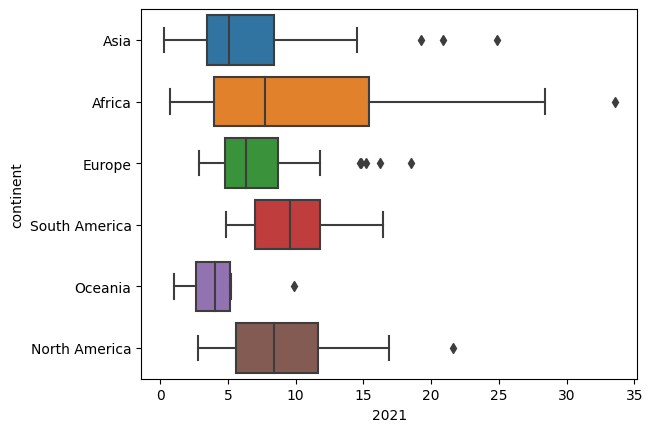

In [16]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment['continent'].isin(['Oceania'])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

# Print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x='2021', y='continent')
plt.show()

### Data summarisation

* `.groupby()` groups data by category
* aggregating function indicates how to summarise the data

`books.groupby('genre').mean()`
other aggregating functions: `.sum()`, `.count()`, `.min()`, `.max()`, `.var()`, `.std()`

* `.agg()` - applies aggregating fucntions across a dataframe

* `books.agg(['mean', 'std'])` # mean and std only applied to numeric columns in df
* can use dictionary to specify which aggregations to apply to which columns: 
  * `books.agg({'rating':['mean', 'std'], 'year': ['median']})` # col to apply and what to apply to that column
* named summary columns: 
  * `books.groupby('genre').agg(mean_rating=('rating', 'mean'), std_rating=('rating', 'std'), median_year=('year', 'median'))`
  * this will group by 'genre' then take mean rating, std of rating, and median year for each genre

**visualise with barplots**
* `sns.barplot(data=books, x='genre', y='rating')`

In [17]:
## working example
# Print the mean and standard deviation of rates by year
print(unemployment.agg(['mean', 'std']))

# Print yearly mean and standard deviation grouped by continent
print(unemployment.groupby('continent').agg(['mean', 'std']))

continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021', 'mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021', 'std'),
)
print(continent_summary)

          2010      2011      2012      2013      2014      2015      2016  \
mean  8.409286  8.315440  8.317967  8.344780  8.179670  8.058901  7.925879   
std   6.248887  6.266795  6.367270  6.416041  6.284241  6.161170  6.045439   

          2017      2018      2019      2020      2021  
mean  7.668626  7.426429  7.243736  8.420934  8.390879  
std   5.902152  5.818915  5.696573  6.040915  6.067192  
                    2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721

C:\Users\zoona\AppData\Local\Temp\ipykernel_27736\3401404275.py:3: FutureWarning: ['country_code', 'country_name', 'continent'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(unemployment.agg(['mean', 'std']))
C:\Users\zoona\AppData\Local\Temp\ipykernel_27736\3401404275.py:6: FutureWarning: ['country_code', 'country_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(unemployment.groupby('continent').agg(['mean', 'std']))


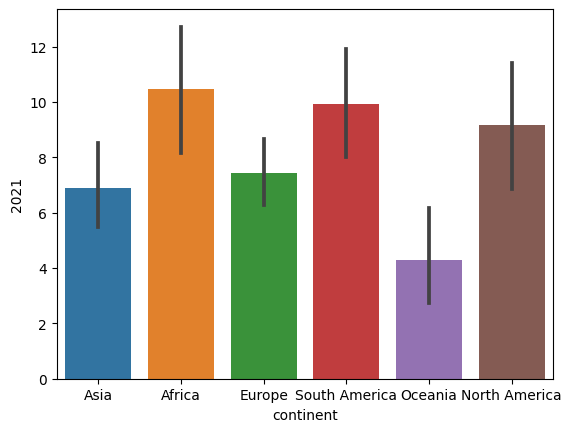

In [18]:
# Create a bar plot of continents and their average unemployment
sns.barplot(data=unemployment, x='continent', y='2021')
plt.show()

## 2 Data cleaning and imputation

* missing data makes sample misrepresentative of population and impacts results
* drop missing values if 5% or less of total values
* impute mean, median, mode
* impute by subgroup

In [15]:
# example approach
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


salaries = pd.read_csv('ds_salaries_clean.csv')

# missing values
print(salaries.isna().sum())

# missing value threshold (5%) - to get upper limit of what is acceptable
threshold = 0.05 * len(salaries)
print(threshold)

#  get columns with missing values less than or equal to threshold
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)

# drop missing values
salaries.dropna(subset=cols_to_drop, inplace=True)

# filter for remaining missing values
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)

# fill missing values with mode
for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0], inplace=True)
print(salaries.isna().sum())

# fill missing values with median
salaries_dict = salaries.groupby('Experience')['Salary_USD'].median().to_dict()
print(salaries_dict)
salaries['Salary_USD'] = salaries['Salary_USD'].fillna(salaries['Experience'].map(salaries_dict))

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64
30.35
Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')
Index([], dtype='object')
Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64
{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}


Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


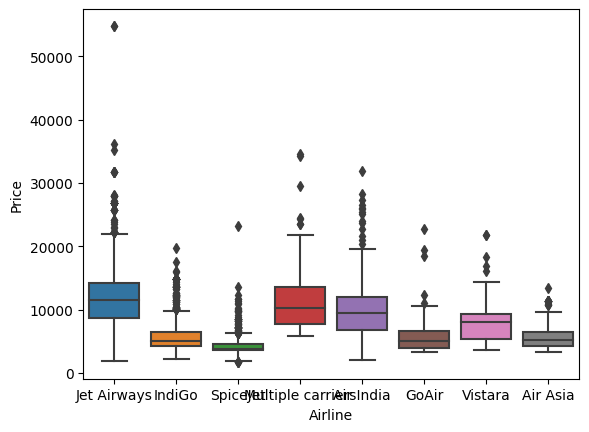

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


In [20]:
# example data

planes = pd.read_csv('planes.csv')

# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

# Check the values of the Additional_Info column
print(planes['Additional_Info'].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')

plt.show()

# drop 'Additional Info' column
planes.drop('Additional_Info', axis=1, inplace=True)

# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
#prices_dict = planes.groupby('Airline')['Price'].median().to_dict()
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())


### categorical data

* preview data
`print(df.select_dtypes('object').head())`
* value counts
* `df['col'].value_counts()`
* unique counts
* `df['col'].nunique()`

* extracting value from categories
`pandas.Series.str.contains('Term1|Term2')` to search a column for a specificstring or multiple strings (OR)
`df['col'].str.contains('^Data')` to search any that start with Data

* finding multiple phrases in strings: 


In [6]:
import numpy as np

job_categories = ['Data Scientist', 'Data Analytics', 'Data Engineering','Machine Learning', 'Managerial', 'Consultant']

data_science = 'Data Scientist|NLP'
data_analyst = 'Analyst|Analytics'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
manager = 'Manager|Director|Lead|Head|Principal|Staff'
consultant = 'Consultant|Freelance'

# conditions
conditions = [
    (salaries['Designation'].str.contains(data_science, case=False)),
    (salaries['Designation'].str.contains(data_analyst, case=False)),
    (salaries['Designation'].str.contains(data_engineer, case=False)),
    (salaries['Designation'].str.contains(ml_engineer, case=False)),
    (salaries['Designation'].str.contains(manager, case=False)),
    (salaries['Designation'].str.contains(consultant, case=False))
]

# create new column
salaries['Job_Category'] = np.select(conditions, job_categories, default='Other')

print(salaries[['Designation', 'Job_Category']].head())
print(salaries['Designation'].value_counts())


                  Designation      Job_Category
0              Data Scientist    Data Scientist
1  Machine Learning Scientist  Machine Learning
2           Big Data Engineer  Data Engineering
3        Product Data Analyst    Data Analytics
4   Machine Learning Engineer  Machine Learning
Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                 

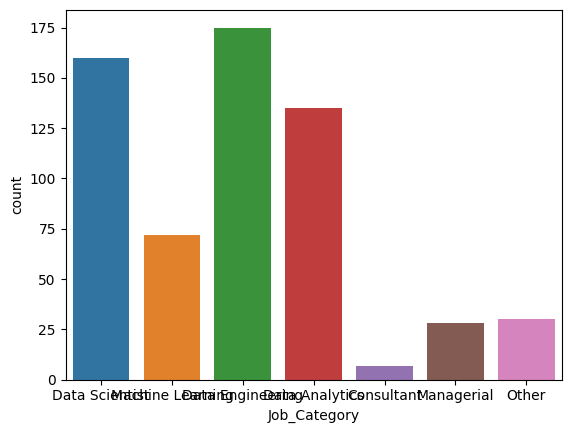

In [54]:
#visualise job categories
sns.countplot(data=salaries, x='Job_Category')
plt.show()

In [55]:
# example
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


In [59]:
# duration should not be object column 
print(planes['Duration'].head())

# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values, include ^ to indicate start of string otherwise 10h will be included
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


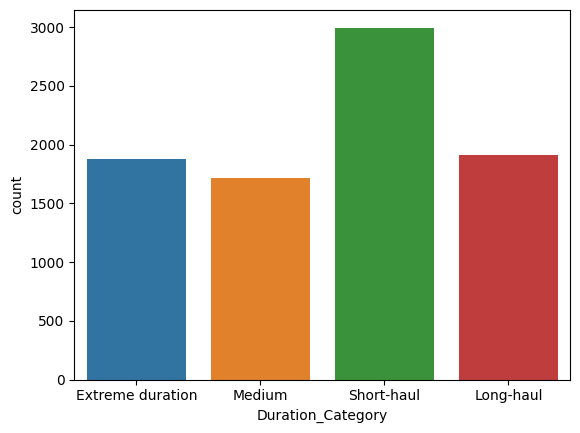

In [60]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

### numeric data

`df.info()`
* `pd.Series.str.replace("char to remove", "char to replace them with")` 
* `df['col].astype(float)`

**adding summary stats into a df**
1. `df['std_dev] = df.groupby('col')['col2'].transform(lambda x: x.std())`
2. `print(df[['col', 'std_dev']].value_counts())` 



0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


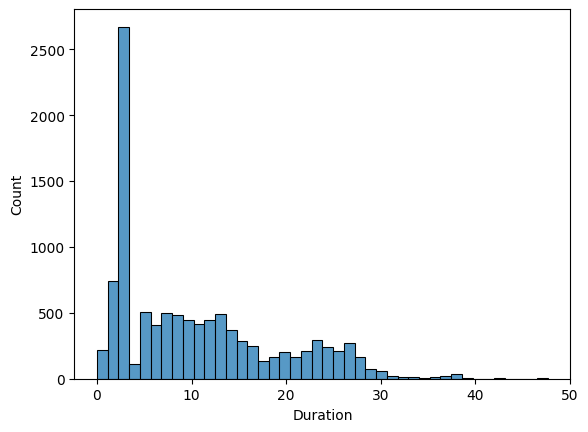

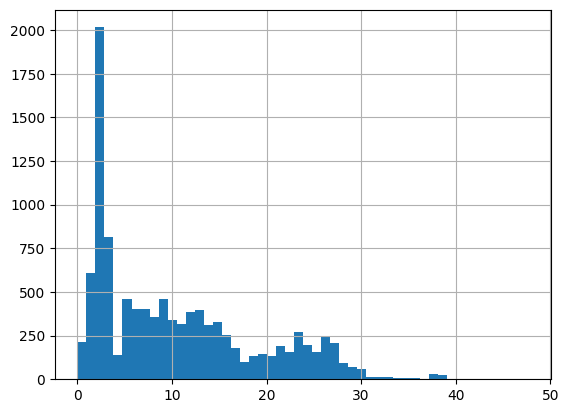

In [77]:
# example
planes = pd.read_csv('planes.csv')
# Preview the column
print(planes["Duration"].head())

# Split the 'Duration' column
duration_split = planes['Duration'].str.split(' ', n=1, expand=True)

# Assign the result to 'hours' and 'minutes'
planes['hours'] = duration_split[0]
planes['minutes'] = duration_split[1]

# Fill NaN values with '0h' and '0m'
planes['hours'].fillna('0h', inplace=True)
planes['minutes'].fillna('0m', inplace=True)

# If 'h' is not in the string, assume the duration is in minutes
planes.loc[~planes['hours'].str.contains('h'), 'minutes'] = planes['hours']
planes.loc[~planes['hours'].str.contains('h'), 'hours'] = '0h'

# Remove the 'h' and 'm' characters from 'hours' and 'minutes'
planes['hours'] = planes['hours'].str.replace('h', '')
planes['minutes'] = planes['minutes'].str.replace('m', '')

# Convert 'hours' and 'minutes' to integers
planes['hours'] = planes['hours'].astype(int)
planes['minutes'] = planes['minutes'].astype(int)

# Convert the duration to minutes
planes['Duration'] = (planes['hours']*60 + planes['minutes'])/60

# Plot a histogram
sns.histplot(data=planes, x='Duration')
plt.show()

planes['Duration'].hist(bins=50)
plt.show()



In [79]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4230.748840             3685
IndiGo             2266.753552             1981
Air India          3865.871975             1686
Multiple carriers  3763.674706             1148
SpiceJet           1790.851944              787
Vistara            2864.267802              455
Air Asia           2016.738954              309
GoAir              2790.815129              182
dtype: int64


### outliers

* `df['col'].describe()`
* IQR - look at box plots, diamonds outside box, whiskers:
  * upper outliers > 75th percentile + (1.5 * IQR)
  * lower outliers < 25th percentile - (1.5 * IQR)

* seventy_fifth = df['col'].quantile(0.75)
* twenty_fifth = df['col'].quantile(0.25)
* df_iqr = seventy_fifth - twenty_fifth
* upper = seventy_fifth + (1.5 * df_iqr)
* lower = twenty_fifth - (1.5 * df_iqr)

* subset data for outliers: 
`df[(df['col] < lower) | (df['col] > upper)] \ [['col2', 'col3', 'col']]`

Outliers: 
* extreme values
  * may not accurately represent data
* can change mean and SD
* statistical tests and ML need normally distributed data

**Questions**
* why do these exist?
* is the data accurate?

* dropping: `df[(df['col'] > lower) & (df['col'] < upper)]`

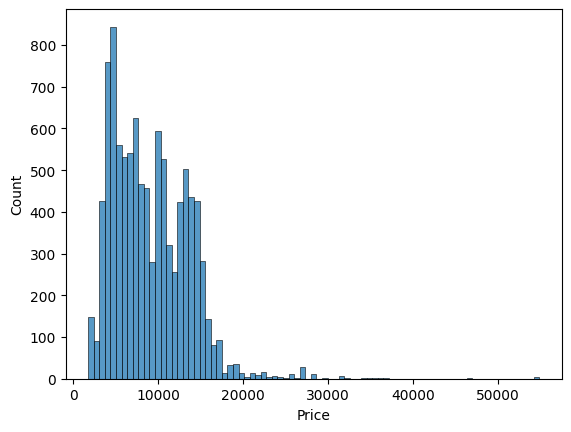

count    10660.000000
mean        10.508537
std          8.520648
min          0.000000
25%          2.833333
50%          8.416667
75%         15.416667
max         47.666667
Name: Duration, dtype: float64
count     9959.000000
mean      8875.160860
std       4057.202002
min       1759.000000
25%       5228.000000
50%       8283.000000
75%      12284.000000
max      23001.000000
Name: Price, dtype: float64


In [82]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x='Price')
plt.show()

# Display descriptive statistics for flight duration
print(planes['Duration'].describe())

# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())


## 3 Relationships in data

### Patterns over time

* typically, datetime is imported as string
* `pd.read_csv(filename, parse_dates=["colwithdates"])`

* converting to datetime: 
* `pd.to_datetime(df['colwithdates'])`

* month, day, year can be combined into single date:
* `pd.to_datetime(df[['month', 'day', 'year']])` 

* extract datetime elements
* `df['datecol'].dt.month`   or `dt.day` or `dt.year`

* lineplots to examine relationship over time
* sns lineplots aggregate y values at each value of x and show estimated mean and a confidence interval for that estimate
* to investigate relationship between month and a variable, set x to each month and y to equal variable



divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


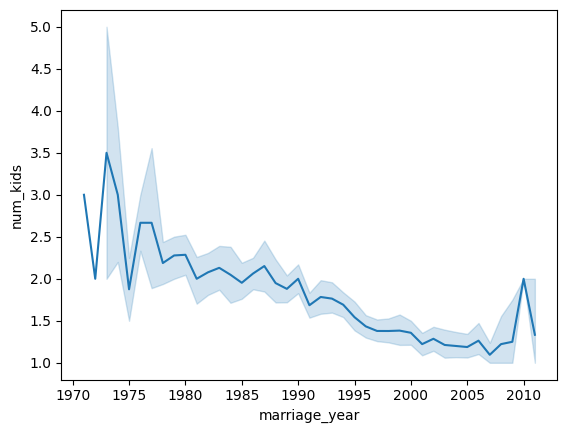

In [5]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv('divorce.csv', parse_dates = ['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
print(divorce.dtypes)

# Define the marriage_year column
divorce["marriage_year"] = divorce['marriage_date'].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data = divorce, y = 'num_kids', x = 'marriage_year')
plt.show()

### Correlation

* describes direction and strength of relationship between two variables
* helps us use variables to predict future outcomes

`df.corr()` - calculates Pearson correlation which is *linear* relationship

* `sns.heatmap(df.corr(), annot=True)` 

* correlation in context - the divorce dataset is about marriages which ended between 2000 and 2015 - marriages that started earlier will by definition have a long duration than those that started in later years

* also may ahve strong non-linear relationships or a non-linear is better
* `sns.scatterplot(data=df, x='col', y = 'col')`
* `sns.pairplot(data=df)` -> can limit this by `sns.pairplot(data=df, vars=['list', 'of', 'variables'])`


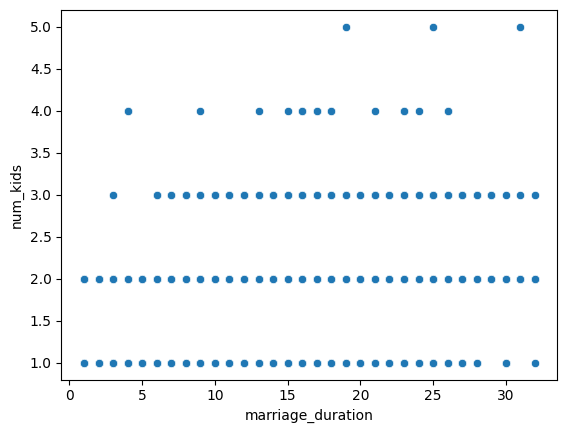

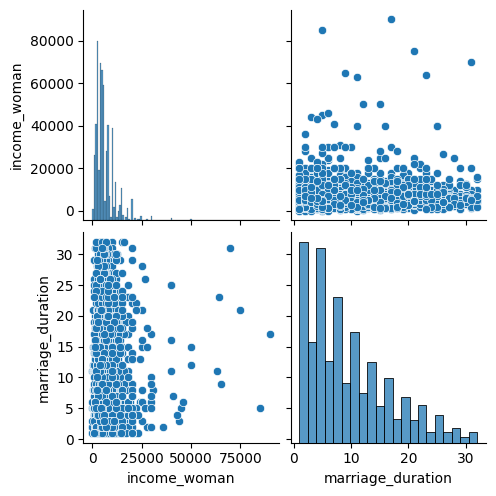

In [11]:


# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()

# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=['income_woman', 'marriage_duration'])
plt.show()

### factor relationships

`df['col'].value_counts()`

`sns.histplot(data=df, x='numericcol', hue='factor/category', binwidth=1)`

**kernel density estimate** 

`sns.kdeplot(data=df, x='num_col', hue='factor_col')`

* KDEs visualise distributions
* pay attention to smoothing curve issues - use cut: `sns.kdeplot(data=df, x='num_col', hue='factor_col', cut=0)` (sets minimum)

**cumulative kde**

`sns.kdeplot(data=df, x='num_col', hue='factor_col', cut=0, cumulative=True)` -> cumulative function

**relationship between numeric and categorical**
* set the hue argument



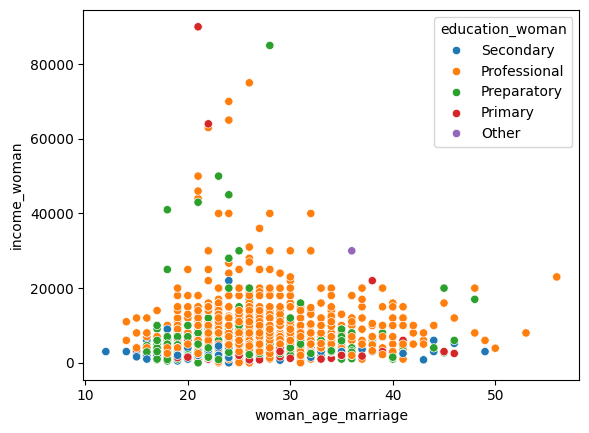

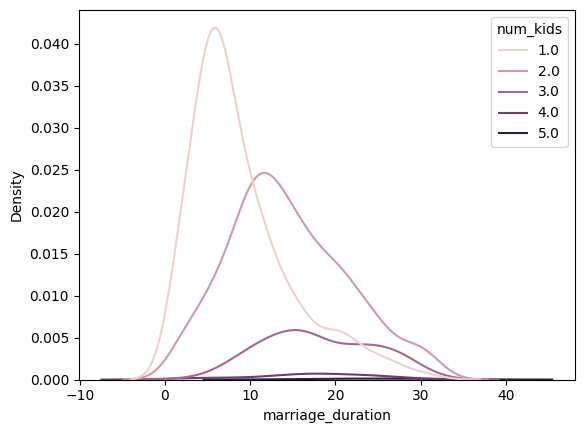

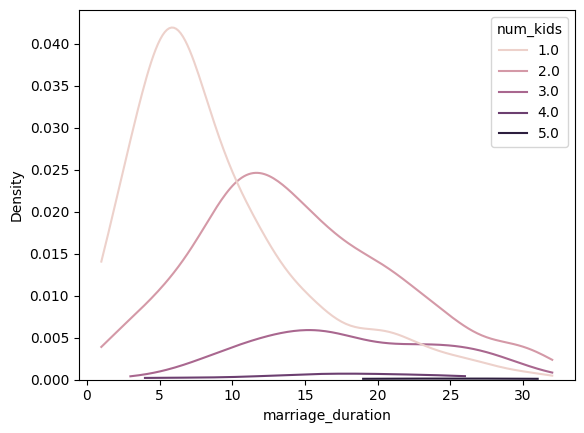

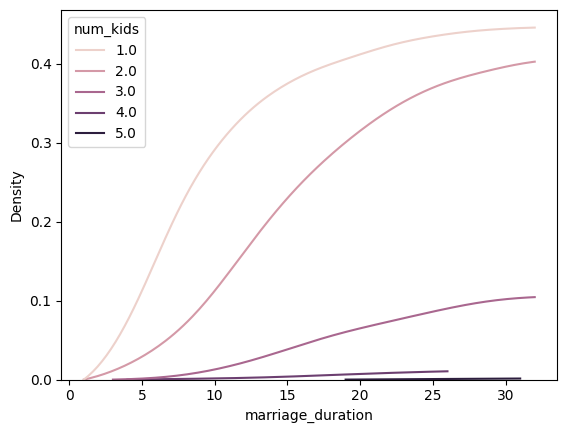

In [14]:
# new columns
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year

# Create the scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman')
plt.show()

# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue='num_kids')
plt.show()

# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

## 4 Turning EDA into Action

* patterns, relationships
* questions
* ML prep

* Sample must be representative of population 
* Class imbalances

### Relative class frequencies
* `df['col'].value_counts(normalize=True)`
* Cross-tabulation: `pd.crosstab(df['col1'], df['col2'] )`
* Aggregated values with crosstab: `pd.crosstab(df['col1'], df['col2'], values=df['col3'], aggfunc='median' )`

In [5]:
# example

import pandas as pd

salaries = pd.read_csv('ds_salaries_clean.csv')
salaries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB


In [7]:
# run earlier job_category cell first
# Print the relative frequency of Job_Category
print(salaries['Job_Category'].value_counts(normalize=True))

Job_Category
Data Engineering    0.288303
Data Scientist      0.263591
Data Analytics      0.222405
Machine Learning    0.118616
Other               0.049423
Managerial          0.046129
Consultant          0.011532
Name: proportion, dtype: float64


In [10]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22
Company_Size       L    M   S
Job_Category                 
Consultant         3    1   3
Data Analytics    32   91  12
Data Engineering  54  107  14
Data Scientist    56   81  23
Machine Learning  25   25  22
Managerial        14   11   3
Other             14   10   6
Company_Size                  L              M             S
Job_Category                                                
Consultant         77553.000000    5449.000000  75296.333333
Data Analytics    102997.125000   98125.835165  43074.500000
Data Engineering  113829.888889  116668.971963  85645.285714
Data Scientist    107865.303571  121664.888889  70426.869565
Machine Learning  123878.520000  100849.480000  85124.954545
Managerial        170102.857143  160419.454545  98976.333333
Other              963

### generating new features



In [11]:
# example 

# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] = salaries['date_of_response'].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(), annot=True)
plt.show()

KeyError: 'date_of_response'

In [12]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries['Salary_USD'].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


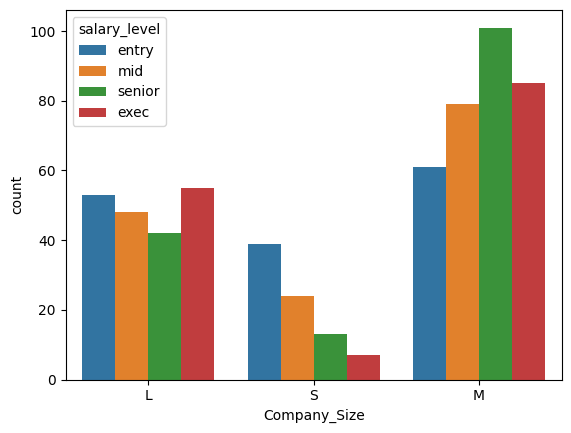

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

### generating hypothesis

* would data from a different time give the same results?
* detecting relationships, differences and patterns
    * **hypothesis testing**
* hypothesis testing requires, prior to data collection: 
    * generating a hypothesis or question
    * decision on what statistical test to use

* data snooping - p-hacking -> if we look at enough data, we will find relationships, patterns, etc.

1. EDA or hunch
2. generate hypothesis to test
3. design experiment
4. test significance

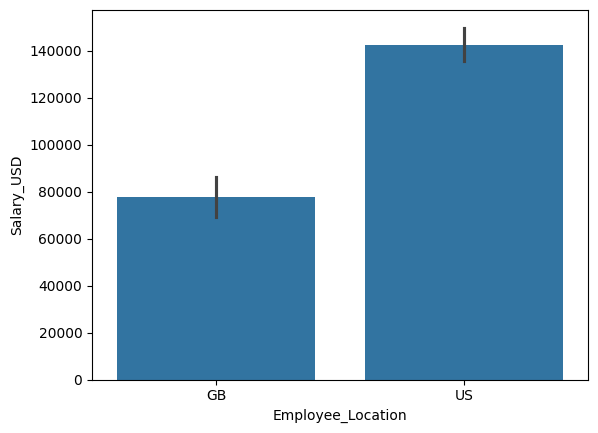

In [17]:
# example

# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, y="Salary_USD", x="Employee_Location")
plt.show()

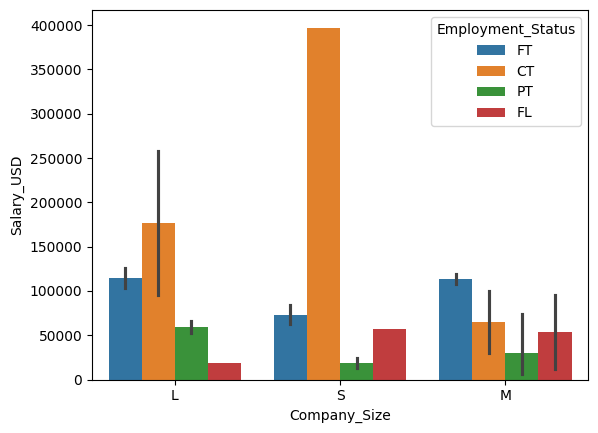

In [18]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()